

# Project: Investigating the TMDb movie data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

## Research Question

1. What is the average runtime over years?
2. What is the average revenue a movie makes over time?
3. What is the average voting over time?
4. What is the most popular genre?
5. What is the relation between budget and revenue?
6. What is the relation between vote average and revenue?
7. What is the relation between runtime and voting average?

In [2]:
# packages required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


In [3]:
#load data
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [600]:
#check data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [601]:
#print summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning 
1. Dropping duplicated values based on 'id' column
2. Changing data type
3. Dropping column irrelevant for the analysis
4. Dropping null values

In [4]:
#select duplicated based on 'id'
df[df['id'].duplicated() == True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [5]:
#drop duplicated value in 'id' column
df = df.drop_duplicates(subset='id', keep = 'first')

In [6]:
#convert release_date variable into datetimes 
df["release_date"] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres          

In [7]:
#drop columns irrelevant for this analysis
drop = ['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'budget_adj', 'revenue_adj']
df.drop(drop, inplace = True, axis=1)

In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float64       
 1   budget                10865 non-null  int64         
 2   revenue               10865 non-null  int64         
 3   original_title        10865 non-null  object        
 4   director              10821 non-null  object        
 5   overview              10861 non-null  object        
 6   runtime               10865 non-null  int64         
 7   genres                10842 non-null  object        
 8   production_companies  9835 non-null   object        
 9   release_date          10865 non-null  datetime64[ns]
 10  vote_count            10865 non-null  int64         
 11  vote_average          10865 non-null  float64       
 12  release_year          10865 non-null  int64         
dtypes: datetime64[ns

In [8]:
#count zeros in columns
(df == 0).sum()

popularity                 0
budget                  5696
revenue                 6016
original_title             0
director                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [9]:
#replace zero with nan
df = df.replace(0, np.nan)

In [10]:
# Droping null values
df = df.dropna()

In [39]:
#copy dataframe into a new variable
dff = df

<a id='eda'></a>
## Exploratory Data Analysis

In this section we can utilise the cleaned data to explore and visualise our data. The data will be used in order to answer the above questions set out in the Research Question section.

### Research Question 1: What is the average runtime over years?
The independent variable is release_year and the dependent variable is runtime. First, a 1d Analysis of the variable 'runtime' is conducted. Afterwards, the two variables are groupby, the mean is taken for runtime and both variables are visualised.


In [45]:
#descriptive statistics around variable 'runtime'
dff['runtime'].describe()

count    3.807000e+03
mean     1.089161e+08
std      1.772686e+08
min      2.000000e+00
25%      1.425795e+07
50%      4.620143e+07
75%      1.260554e+08
max      2.781506e+09
Name: revenue, dtype: float64

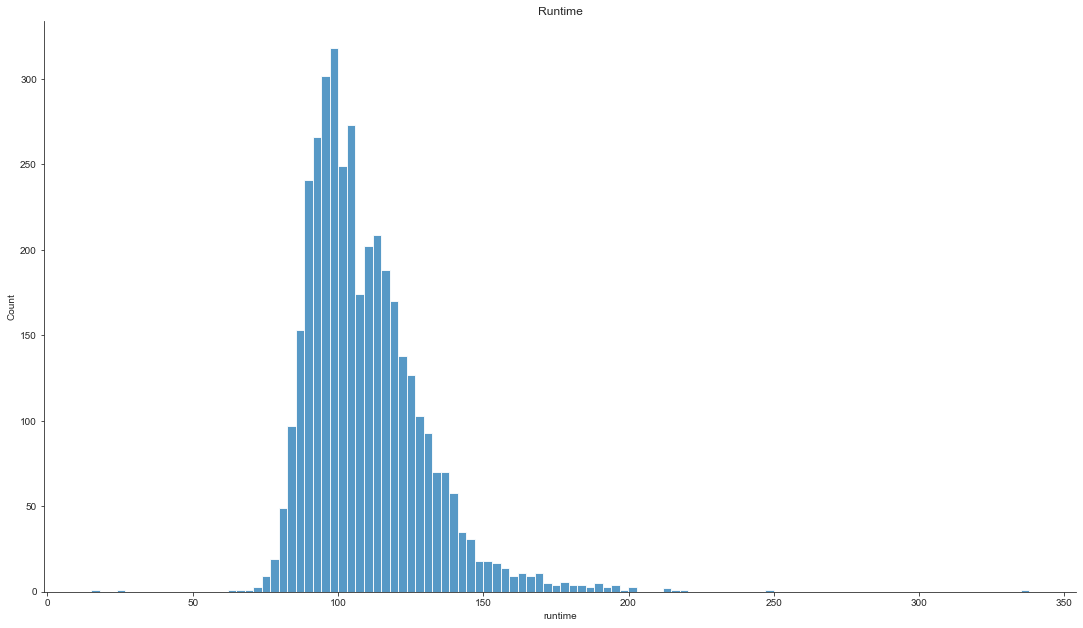

In [47]:
#1d Visualisation of 'runtime'
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.histplot(dff['runtime'] , ax=ax)
plt.title('Runtime')
sns.despine();

In [ ]:
avg_rt = dff.groupby('release_year')['runtime'].mean()
print(avg_rt)

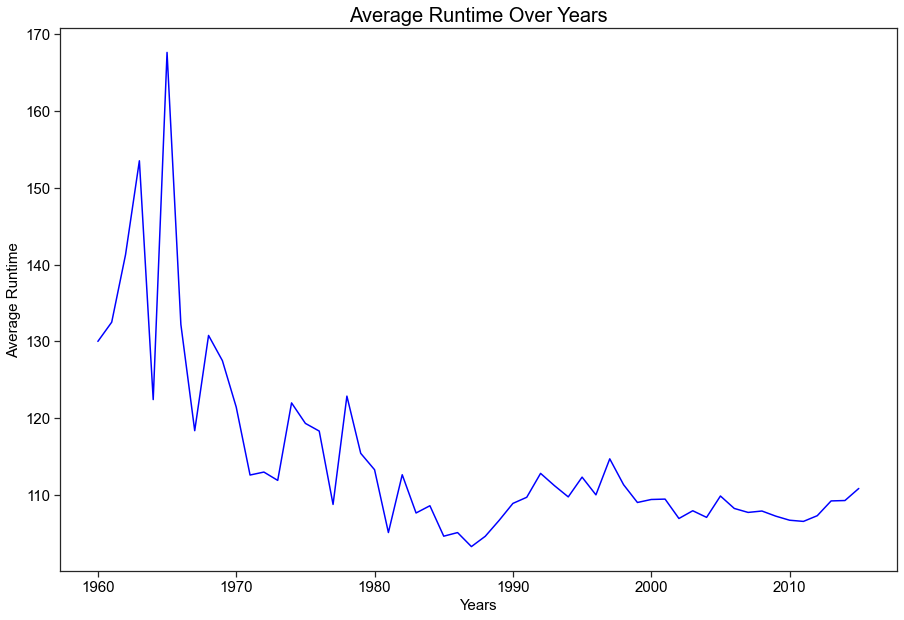

In [653]:
%matplotlib inline
fig= plt.figure(figsize=(15,10))
plt.plot(avg_rt,'blue')
plt.xlabel('Years', fontsize=15,color='black')
plt.ylabel('Average Runtime', fontsize=15,color='black')
plt.title('Average Runtime Over Years', fontsize=20, color ='black')
plt.xticks(fontsize=15, color='black')
plt.yticks(fontsize=15, color='black');

#### Result
The above figure illustrates that the runtime for movies decreased over time.

### Research Question 2  What is the average revenue a movie makes over time?

The independent variable is again release_year and the dependent variable is revenue.

The same strategy will be applied here as above in that both variables will be groupby and the average in taken of revenue.

In [613]:
# Continue to explore the data to address your additional research
avg_rv = dff.groupby('release_year')['revenue'].mean()

After the above operation, the visualisation can be done.

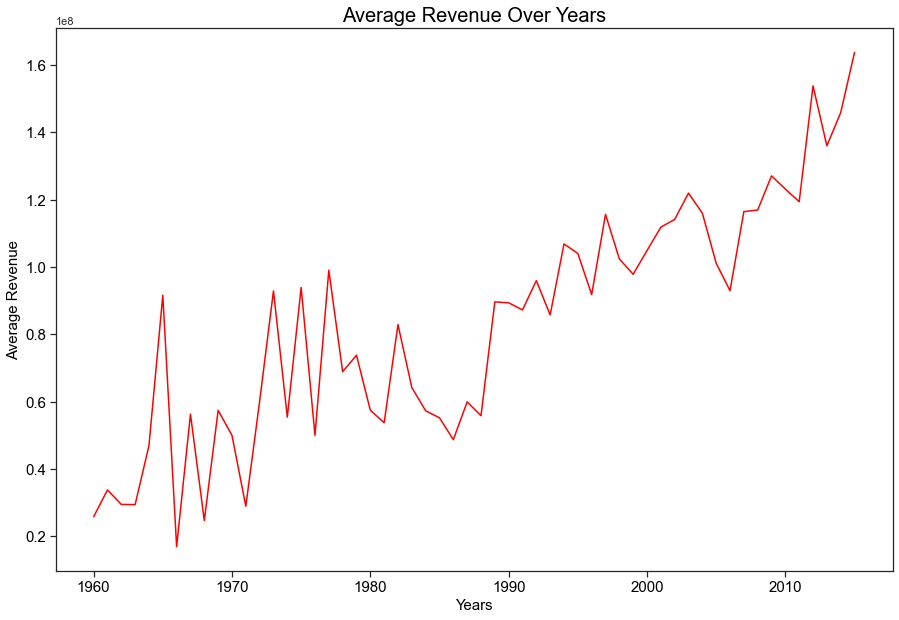

In [651]:
%matplotlib inline
fig= plt.figure(figsize=(15,10))
plt.plot(avg_rv,'red')
plt.xlabel('Years', fontsize=15,color='black')
plt.ylabel('Average Revenue', fontsize=15,color='black')
plt.title('Average Revenue Over Years', fontsize=20, color ='black')
plt.xticks(fontsize=15, color='black')
plt.yticks(fontsize=15, color='black');

#### Result
Over time the average revenue increased.

### Research Question 3  What is the average voting over time?

The independent variable is again release_year and the dependent variable is vote_average. First, a 1d Analysis of the variable 'vote_average' is conducted. Afterwards, the two variables are groupby, the mean is taken for vote_average across all years.

In [50]:
#descriptive statistics around variable 'vote_average'
dff['vote_average'].describe()

count    3807.000000
mean        6.170239
std         0.792423
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

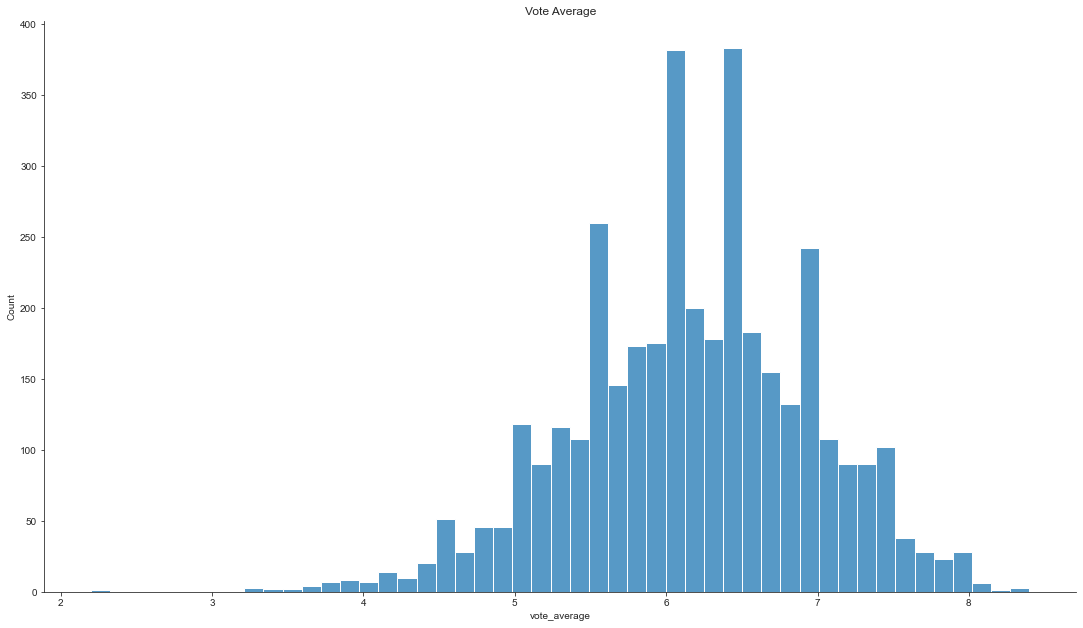

In [51]:
#1d Visualisation of 'runtime'
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.histplot(dff['vote_average'] , ax=ax)
plt.title('Vote Average')
sns.despine();

In [615]:
avg_va = dff.groupby('release_year')['vote_average'].mean()

After the above operation, the visualisation can be done.

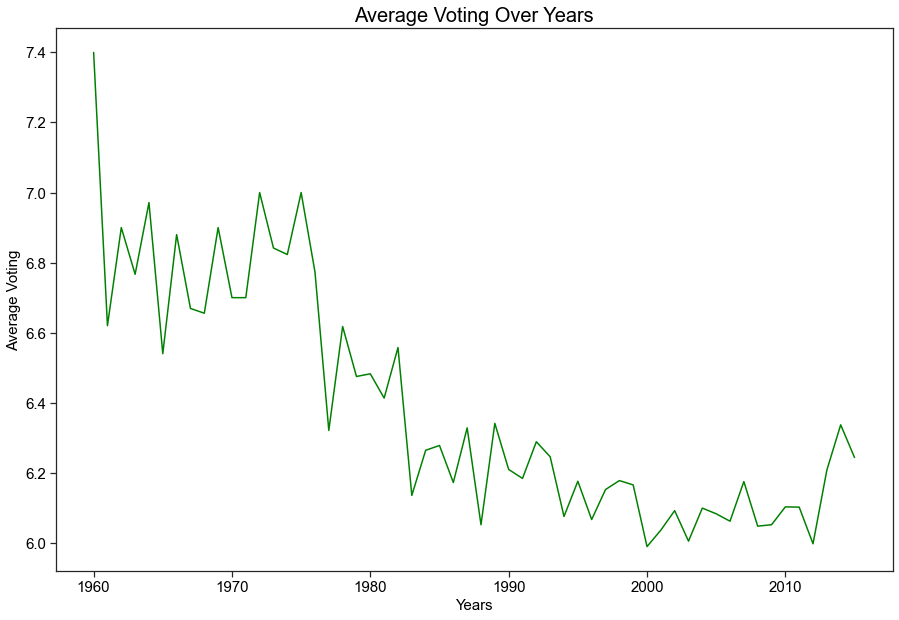

In [652]:
%matplotlib inline
fig= plt.figure(figsize=(15,10))
plt.plot(avg_va,'green')
plt.xlabel('Years', fontsize=15,color='black')
plt.ylabel('Average Voting', fontsize=15,color='black')
plt.title('Average Voting Over Years', fontsize=20, color ='black')
plt.xticks(fontsize=15, color='black')
plt.yticks(fontsize=15, color='black');

#### Result
The voting average decreased over time. This is fairly interesting, since the results of Question 2 illustrated that the average revenue increased over time. In other words, despite the decreasing voting average of movies, the revenue of the film industry is rising. Reasons could again be multifolded such as that due to the increase in movies produced overall, the proportion of negatively voted movies released being higher than positively voted movies. 

### Research Question 4 What is the most popular genre?
In order to evaluate which genre is the most popular, the string value in column 'genres' needs to be separated. 

In [63]:
#separating the string value genre
dff[['Genre1','Genre2','Genre3','Genre4','Genre5']] = dff.genres.str.split("|",expand=True)
dff

,popularity,budget,revenue,original_title,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Genre1,Genre2,Genre3,Genre4,Genre5
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,Adventure,Science Fiction,Thriller,None,None
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,Action,Adventure,Science Fiction,Fantasy,None
4,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,Action,Crime,Thriller,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,0.670274,7500000.0,3.373669e+07,Who's Afraid of Virginia Woolf?,Mike Nichols,Mike Nicholsâ€™ film from Edward Albee's play ...,131.0,Drama,Chenault Productions,2066-06-21,74,7.5,1966,Drama,None,None,None,None
10828,0.402730,3000000.0,1.300000e+07,Torn Curtain,Alfred Hitchcock,An American scientist publicly defects to East...,128.0,Mystery|Thriller,Universal Pictures,2066-07-13,46,6.3,1966,Mystery,Thriller,None,None,None
10829,0.395668,4653000.0,6.000000e+06,El Dorado,Howard Hawks,"Cole Thornton, a gunfighter for hire, joins fo...",120.0,Action|Western,Paramount Pictures|Laurel Productions,2066-12-17,36,6.9,1966,Action,Western,None,None,None
10835,0.299911,12000000.0,2.000000e+07,The Sand Pebbles,Robert Wise,Engineer Jake Holman arrives aboard the gunboa...,182.0,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,2066-12-20,28,7.0,1966,Action,Adventure,Drama,War,Romance


In [64]:
#dropping the original genres column
dff.drop(['genres'], axis=1)

,popularity,budget,revenue,original_title,director,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,Genre1,Genre2,Genre3,Genre4,Genre5
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119.0,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,Adventure,Science Fiction,Thriller,None,None
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136.0,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,Action,Adventure,Science Fiction,Fantasy,None
4,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,Action,Crime,Thriller,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,0.670274,7500000.0,3.373669e+07,Who's Afraid of Virginia Woolf?,Mike Nichols,Mike Nicholsâ€™ film from Edward Albee's play ...,131.0,Chenault Productions,2066-06-21,74,7.5,1966,Drama,None,None,None,None
10828,0.402730,3000000.0,1.300000e+07,Torn Curtain,Alfred Hitchcock,An American scientist publicly defects to East...,128.0,Universal Pictures,2066-07-13,46,6.3,1966,Mystery,Thriller,None,None,None
10829,0.395668,4653000.0,6.000000e+06,El Dorado,Howard Hawks,"Cole Thornton, a gunfighter for hire, joins fo...",120.0,Paramount Pictures|Laurel Productions,2066-12-17,36,6.9,1966,Action,Western,None,None,None
10835,0.299911,12000000.0,2.000000e+07,The Sand Pebbles,Robert Wise,Engineer Jake Holman arrives aboard the gunboa...,182.0,Twentieth Century Fox Film Corporation|Solar P...,2066-12-20,28,7.0,1966,Action,Adventure,Drama,War,Romance


In [65]:
#converting pandas series into dataframe
genre_total=dff[['Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5']].apply(pd.Series.value_counts).sum(axis=1)
genre_total = genre_total.to_frame().reset_index()
genre_total.columns = ['Genre', 'Total'] 
genre_total

,Genre,Total
0,Action,1076.0
1,Adventure,743.0
2,Animation,199.0
3,Comedy,1335.0
4,Crime,649.0
5,Documentary,28.0
6,Drama,1730.0
7,Family,417.0
8,Fantasy,395.0
9,Foreign,9.0


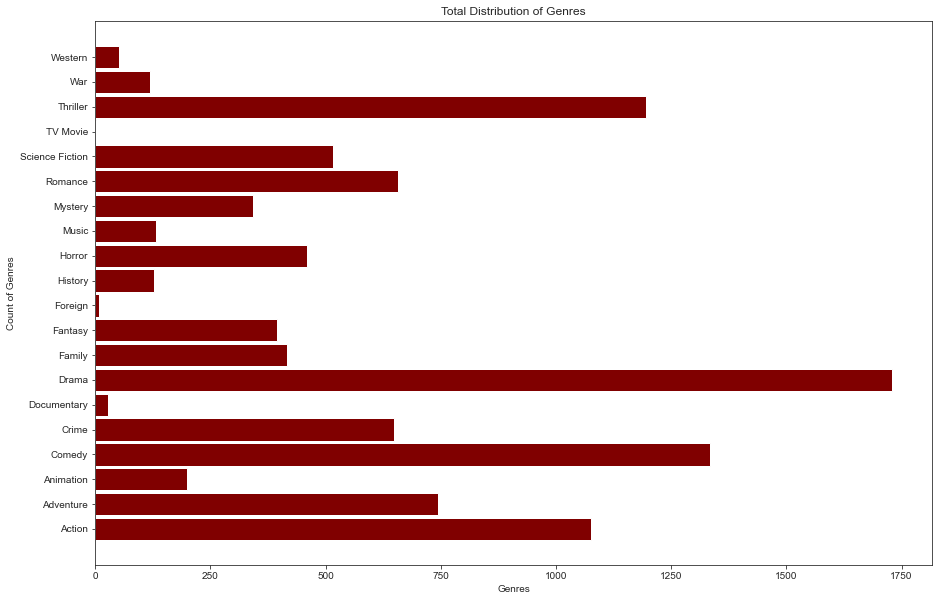

In [77]:
#creating barplot
fig = plt.figure(figsize = (15, 10)) 
x= genre_total["Genre"]
y= genre_total["Total"]
plt.barh(x, y, color ='maroon', height = 0.9) 
plt.xlabel("Genres") 
plt.ylabel("Count of Genres") 
plt.title("Total Distribution of Genres") 
plt.show();

#### Result
The graph shows that the genre 'Drama' is the most popular genre with 1730 movies released overall, followed by 'Comedy' with 1335 movies and 'Thriller' with 1195 movies. 

### Research Question 5 What is the relation between budget and revenue?
Two values used and regressed in order to see whether or not budget is related to revenue.

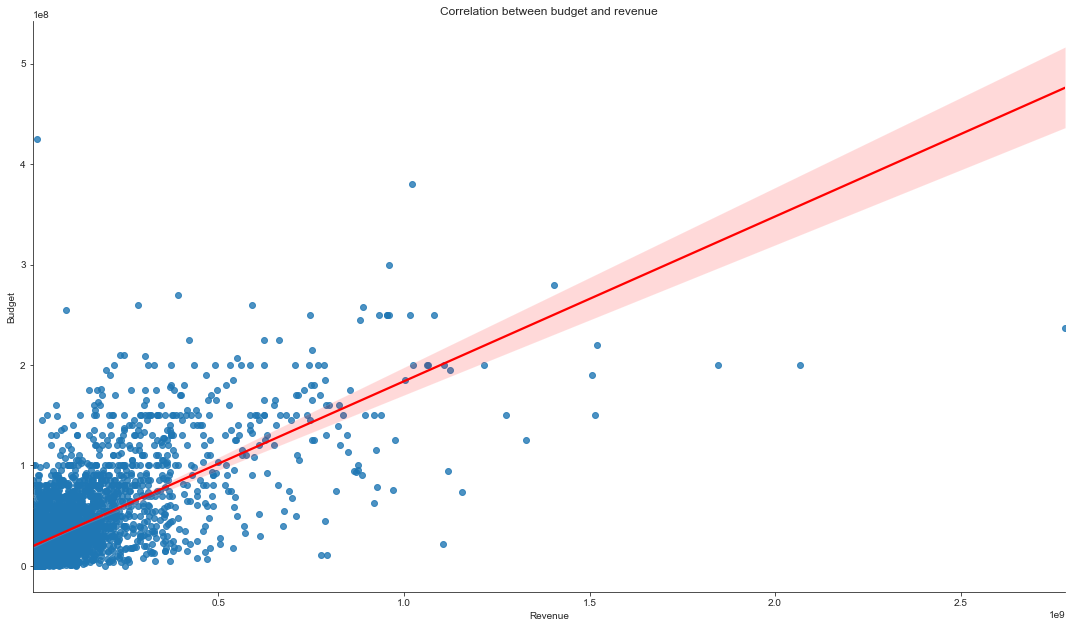

In [56]:
x= dff["revenue"]
y=dff["budget"]
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(x=x, y=y, ax=ax, line_kws={"color":"red"})
sns.despine()
plt.title("Correlation between budget and revenue")
plt.xlabel("Revenue")
plt.ylabel("Budget");

#### Result
The graph illustrated a relatively strong positive correlation between budget and revenue. In other words, it appears as if more budget is positively correlated to higher revenue.

### Research Question 6 What is the relation between vote average and revenue?
The purpose of this was to understand whether or not higher revenues is also correlated with higher voting on average.

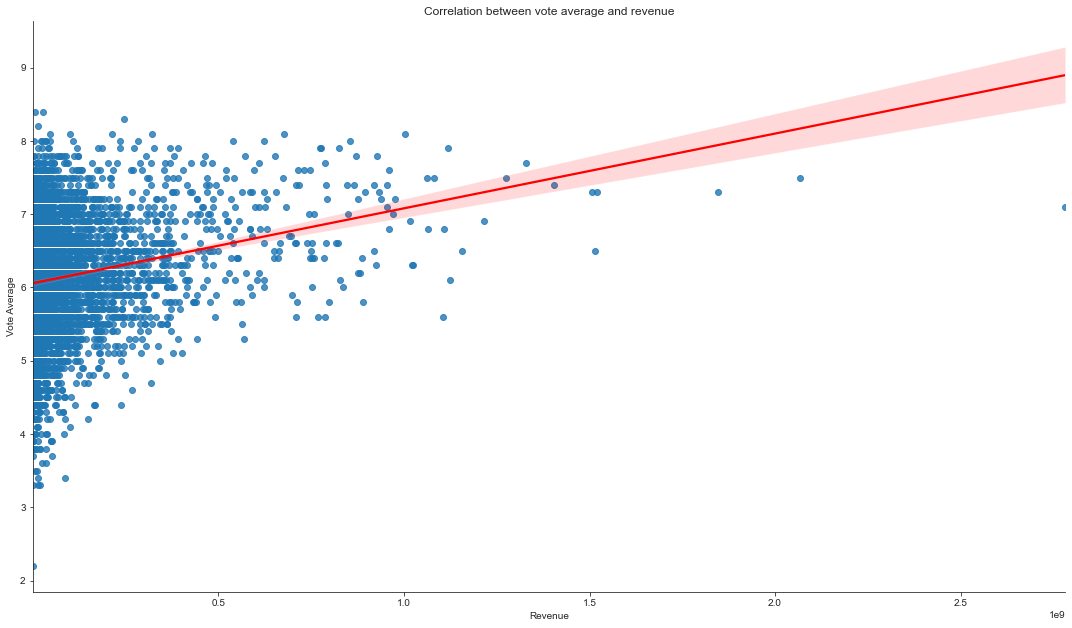

In [57]:
x= dff["revenue"]
y=dff["vote_average"]
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(x=x, y=y, ax=ax, line_kws={"color":"red"})
sns.despine()
plt.title("Correlation between vote average and revenue")
plt.xlabel("Revenue")
plt.ylabel("Vote Average");

#### Result
The visualisation depicts that movies higher in revenue, receivce on average higher votings.

### Research Question 7 What is the relation between runtime and voting average?
The purpose here was to see if longer runtimes are associated with higher votings on average.

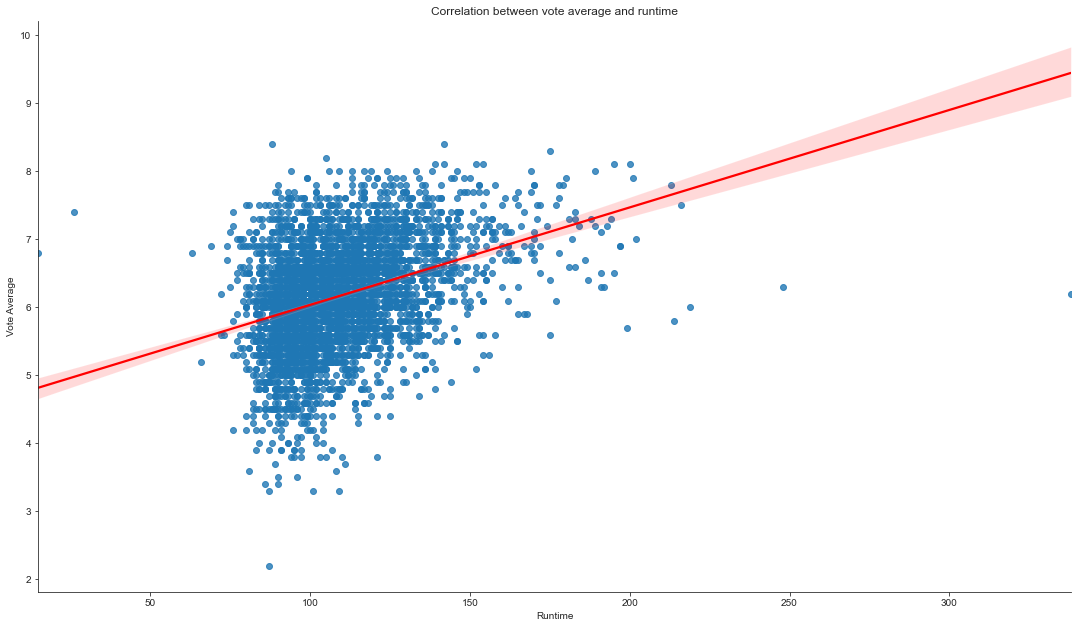

In [58]:
x= dff["runtime"]
y=dff["vote_average"]
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(x=x, y=y, ax=ax, line_kws={"color":"red"})
sns.despine()
plt.title("Correlation between vote average and runtime")
plt.xlabel("Runtime")
plt.ylabel("Vote Average");

#### Result
Interestingly, the visualisation shows a positive correlation between movie runtime and votings on average. However, it is quesitonable if the correlation is linear. I presume that the relation is rather non-linear. 

<a id='conclusions'></a>
## Conclusions

Over the years, the runtime of movie decreased, the average revenue increased, yet the votings for movies decreased on average. The above figure illustrates that the runtime for movies decreased. An interesting finding is that despite the increase in revenue over time, the average votings for movies decreased. In other words, despite the decreasing voting average of movies, the revenue of the film industry is rising. Reasons could be multifolded such as that due to the increase in movies produced overall, the proportion of negatively voted movies released being higher than positively voted movies.
Further analysis showed that of all genres, most movies that were released fell into the category 'drama', followed by 'Comedy' and 'Thriller. 
Moreover, further analysis illustrated a relatively strong positive correlation between budget and revenue as well as movies higher in revenue, receive on average higher votings. Interestingly, the last visualisation showed a positive correlation between movie runtime and movievotings on average. However, it is quesitonable if the correlation is linear. It can be presumed that the relation is rather non-linear in that at some point, the average voting for a movie would decrease if the runtime was too long. 

## Limitations
Despite that a majority of movies are American, both budget and revenue were missing the currency unit. The data suffered from duplicates and outliers. The data suffers from null values especially for revenue and budget, which affected the analysis.

Furthermore, no statistical analysis were performed, therefore, the conclusions that can be drawn are solely tentative.

## Resources

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

https://seaborn.pydata.org/generated/seaborn.regplot.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
